In [1]:
# https://www.kaggle.com/kemalty/feed-forward-n-n-with-keras-for-fashion-mnist/notebook?select=fashion-mnist_train.csv

import pandas as pd
from keras.utils import to_categorical

# Loading and pre-processing training dataset
train_data = pd.read_csv("data/fashion-mnist_train.csv")
train_data_a = train_data.loc[train_data.label>=5]
train_data_b = train_data.loc[train_data.label<5]

train_label = pd.DataFrame(train_data[["label"]].copy(deep=False)) # Seperate labels (y) from inputs (X)
train_label_a = pd.DataFrame(train_data_a[["label"]].copy(deep=False)) - 5
train_label_b = pd.DataFrame(train_data_b[["label"]].copy(deep=False))

train_input = pd.DataFrame(train_data.drop("label", 1, inplace=False))
train_input_a = pd.DataFrame(train_data_a.drop("label", 1, inplace=False))
train_input_b = pd.DataFrame(train_data_b.drop("label", 1, inplace=False))
del train_data
del train_data_a
del train_data_b

# Convert labels to dummies (one-hot encoding) so that they can be used in the output layer
train_label = to_categorical(train_label)
train_label_a = to_categorical(train_label_a)
train_label_b = to_categorical(train_label_b)

# Normalize the inputs
train_means = train_input.mean(axis=0) # Keep these for test too
train_means_a = train_input_a.mean(axis=0) # Keep these for test too
train_means_b = train_input_b.mean(axis=0) # Keep these for test too

train_stds  = train_input.std(axis=0)
train_stds_a  = train_input_a.std(axis=0)
train_stds_b  = train_input_b.std(axis=0)

print("Means:")
print(train_means.head(5))
print(train_means_a.head(5))
print(train_means_b.head(5))
print("Stds:")
print(train_stds.head(5))
print(train_stds_a.head(5))
print(train_stds_b.head(5))

train_input = train_input - train_means # Zero mean
train_input_a = train_input_a - train_means_a # Zero mean
train_input_b = train_input_b - train_means_b # Zero mean

train_input = train_input / train_stds # 1 standard deviation
train_input_a = train_input_a / train_stds_a # 1 standard deviation
train_input_b = train_input_b / train_stds_b # 1 standard deviation

# Loading and pre-processing testing dataset
test_data = pd.read_csv("data/fashion-mnist_test.csv") # Load the csv from file
test_data_a = test_data.loc[test_data.label>=5]
test_data_b = test_data.loc[test_data.label<5]

test_label = pd.DataFrame(test_data[["label"]].copy(deep=False)) # Seperate labels (y) from inputs (X)
test_label_a = pd.DataFrame(test_data_a[["label"]].copy(deep=False)) - 5 # Seperate labels (y) from inputs (X)
test_label_b = pd.DataFrame(test_data_b[["label"]].copy(deep=False)) # Seperate labels (y) from inputs (X)

test_input = pd.DataFrame(test_data.drop("label", 1, inplace=False))
test_input_a = pd.DataFrame(test_data_a.drop("label", 1, inplace=False))
test_input_b = pd.DataFrame(test_data_b.drop("label", 1, inplace=False))

del test_data
del test_data_a
del test_data_b

# Convert labels to dummies (one-hot encoding) so that they can be used in the output layer
test_label = to_categorical(test_label)
test_label_a = to_categorical(test_label_a)
test_label_b = to_categorical(test_label_b)

print(pd.DataFrame(test_label).describe())

# Apply normalization
test_input = test_input - train_means # Zero mean
test_input = test_input / train_stds # 1 standard deviation
test_input_a = test_input_a - train_means_a # Zero mean
test_input_a = test_input_a / train_stds_a # 1 standard deviation
test_input_b = test_input_b - train_means_b # Zero mean
test_input_b = test_input_b / train_stds_b # 1 standard deviation

import numpy as np

X_train = train_input.to_numpy()
y_train = train_label

X_train_d = [train_input_a.to_numpy(), train_input_b.to_numpy()]
y_train_d = [train_label_a, train_label_b]

X_test_d = [test_input_a.to_numpy(), test_input_b.to_numpy()]
y_test_d = [test_label_a, test_label_b]

Means:
pixel1    0.000900
pixel2    0.006150
pixel3    0.035333
pixel4    0.101933
pixel5    0.247967
dtype: float64
pixel1    0.000867
pixel2    0.007167
pixel3    0.031600
pixel4    0.109067
pixel5    0.265300
dtype: float64
pixel1    0.000933
pixel2    0.005133
pixel3    0.039067
pixel4    0.094800
pixel5    0.230633
dtype: float64
Stds:
pixel1    0.094689
pixel2    0.271011
pixel3    1.222324
pixel4    2.452871
pixel5    4.306912
dtype: float64
pixel1    0.084850
pixel2    0.348022
pixel3    1.588842
pixel4    2.963961
pixel5    5.029310
dtype: float64
pixel1    0.103599
pixel2    0.160544
pixel3    0.680996
pixel4    1.802273
pixel5    3.435846
dtype: float64
                  0             1             2             3             4  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.100000      0.100000      0.100000      0.100000      0.100000   
std        0.300024      0.300024      0.300024      0.300025      0.300024   
min        

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Set-up the network
model = Sequential()
model.add(Dense(units=500, input_dim=train_input.shape[1],
                activation="relu",
                 kernel_initializer="random_uniform",
                 bias_initializer="zeros"))
model.add(Dropout(0.30))
model.add(Dense(units=300, activation="relu", kernel_initializer="random_uniform", bias_initializer="zeros"))
model.add(Dropout(0.25))
model.add(Dense(units=200, activation="relu", kernel_initializer="random_uniform", bias_initializer="zeros"))
model.add(Dropout(0.20))
model.add(Dense(units=100, activation="relu", kernel_initializer="random_uniform", bias_initializer="zeros"))
model.add(Dropout(0.15))
model.add(Dense(units=50, activation="relu", kernel_initializer="random_uniform", bias_initializer="zeros"))
model.add(Dropout(0.10))
model.add(Dense(units=25, activation="relu", kernel_initializer="random_uniform", bias_initializer="zeros"))
model.add(Dropout(0.05))
model.add(Dense(units=5, activation="softmax"))

# Print out the network configuration
print(model.summary())

from keras.optimizers import RMSprop
import keras

model_train_data = X_train_d[0]
model_train_labels = y_train_d[0]

model.compile(loss='categorical_crossentropy', 
          optimizer="RMSprop",#lr=0.0001),
          metrics=['accuracy'])
model.fit(model_train_data, model_train_labels, epochs=20, batch_size=6000)

model_name = "models/model_ff_sep_dense.h5"
model.save(model_name)

# Evaluate the model
test_loss_and_metrics = model.evaluate(X_test_d[0], y_test_d[0])
train_loss_and_metrics = model.evaluate(model_train_data, model_train_labels)
print("")
print("Test Accuracy:" + str(test_loss_and_metrics[1]))
print("Train Accuracy:" + str(train_loss_and_metrics[1]))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               150300    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               60200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               2

In [2]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 5
NO_EPOCHS = 50
BATCH_SIZE = 128

In [6]:
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D

# Model
model1 = Sequential()
# Add convolution 2D
model1.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(NUM_CLASSES, activation='softmax'))


model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

len_train_data = len(X_train_d[1])
len_test_data = len(X_test_d[1])

model_train_data = X_train_d[1].reshape(len_train_data, IMG_ROWS, IMG_COLS, 1)
model_train_labels = y_train_d[1]

model_test_data = X_test_d[1].reshape(len_test_data, IMG_ROWS, IMG_COLS, 1)
model_test_labels = y_test_d[1]

model1.summary()

model1.fit(model_train_data, model_train_labels,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1)

# Evaluate the model
test_loss_and_metrics = model1.evaluate(model_test_data, model_test_labels)
train_loss_and_metrics = model1.evaluate(model_train_data, model_train_labels)
print("")
print("Test Accuracy:" + str(test_loss_and_metrics[1]))
print("Train Accuracy:" + str(train_loss_and_metrics[1]))

model_name = "models/model_ff_sep_conv.h5"
model1.save(model_name)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)              

In [51]:
import math
import numpy as np

def split(array, nrows, ncols):
    """Split a matrix into sub-matrices."""
    r, h = array.shape
    if r % nrows != 0:
        padding = (math.ceil(r / nrows) * nrows) - r
        array = np.vstack((array, np.zeros((padding, h))))
        r, h = array.shape
    if h % ncols != 0:
        padding = (math.ceil(h / ncols) * ncols) - h
        array = np.hstack((array, np.zeros((r, padding))))
        r, h = array.shape
#     print(array.shape)
    num_x_blocks = math.ceil(r / float(nrows))
    num_y_blocks = math.ceil(h / float(ncols))
    
    rows = np.vsplit(array, num_x_blocks)
    return [np.array(np.hsplit(row, num_y_blocks)) for row in rows]  
#     chunks = array.reshape(h//nrows, nrows, -1, ncols).swapaxes(1, 2).reshape(-1, nrows, ncols)
#     return np.split(chunks, num_x_blocks)

def gather_blocks_to_pages(splits, num_elem_per_page):
    blocks = np.concatenate(splits)
    pages = []
    i = 0

    while i < len(blocks):
        count = 0
        page = []
        while i < len(blocks) and count + blocks[i].shape[0] * blocks[i].shape[1] <= num_elem_per_page:
            page.append(blocks[i])
            count += blocks[i].shape[0] * blocks[i].shape[1]
            i += 1
        pages.append(page)
        print("Adding {} elems to page {}".format(count, len(pages) - 1))
    return pages

# So we assume that if one page as lesser blocks than the other,
# We should see if the smaller one matches the bigger one from
# the start, and not anywhere in between
def page_similarity(ps1, ps2):
    sim = np.zeros((len(ps1), len(ps2)))
    
    for i, p1 in enumerate(ps1):
        for j, p2 in enumerate(ps2):
            k = min(len(p1), len(p2))
            a = np.array(p1[:k])
            b = np.array(p2[:k])
            c = np.count_nonzero(np.absolute(a - b) <= 0.01)
            sim[i][j] = c / a.size
    
    return sim
            

def merge_blocks(blocks, num_blocks_x, num_blocks_y, x, y):
    b_x, b_y = blocks[0].shape
    t_x, t_y = (b_x * num_blocks_x, b_y * num_blocks_y,)
    rows = [np.hstack(blocks[i*num_blocks_y:i*num_blocks_y+num_blocks_y]) for i in range(num_blocks_x)]
    matrix = np.vstack(rows)
    assert matrix.shape[0] == t_x
    r_x = t_x - x
    r_y = t_y - y
    if r_x == 0 and r_y == 0:
        return matrix
    elif r_x == 0:
        return matrix[:,:-r_y]
    elif r_y == 0:
        return matrix[:-r_x,:]
    else:
        return matrix[:-r_x, :-r_y]

# merge_blocks(x, 2, 2, 4, 4)
# x[0]

def pages_to_blocks(pages):
    blocks = []
    for p in pages:
        blocks.extend(p)
    return blocks

def merge_pages(p1, p2):
#     print(p1)
#     print(p2)
    ps = []
    for i, p in enumerate(p1):
        if i >= len(p2):
            ps.append(np.array(p))
        else:
            ps.append((p + p2[i]) / 2)
    return ps

def combine_similar_pages(ps1, ps2, sim_scores, threshold=0.9):
    new_ps1 = [None] * len(ps1)
    new_ps2 = [None] * len(ps2)
    
    for ps1_idx, scores in enumerate(sim_scores):
        if np.max(scores) >= threshold:
            ps2_idx = np.argmax(scores)
            print("PS1: Merging {} and {}".format(ps1_idx, ps2_idx))
            new_ps1[ps1_idx] = merge_pages(ps1[ps1_idx], ps2[ps2_idx])
            new_ps2[ps2_idx] = ps1_idx
        else:
            # No need to make new copies here since we should not be using ps1 or ps2 anymore
            new_ps1[ps1_idx] = ps1[ps1_idx]

    for ps2_idx in range(len(ps2)):
        if new_ps2[ps2_idx] is not None:
            ps1_idx = new_ps2[ps2_idx]
            print("PS2: Merging {} and {}".format(ps2_idx, ps1_idx))
            new_ps2[ps2_idx] = merge_pages(ps2[ps2_idx], ps1[ps1_idx])
        else:
            # No need to make new copies here since we should not be using ps1 or ps2 anymore
            new_ps2[ps2_idx] = ps2[ps2_idx]

    return new_ps1, new_ps2

def weight_sim(w1, w2):
    nw1 = w1.flatten()
    nw2 = w2.flatten()
    if nw1.size < nw2.size:
        rem = nw2.size - nw1.size
        nw2 = nw2[:-rem]
    elif nw1.size > nw2.size:
        rem = nw1.size - nw2.size
        nw1 = nw1[:-rem]
        
    return np.count_nonzero(np.absolute(nw2 - nw1) <= 0.01) / nw1.size

def share_weights(w1, w2, a, b, c, t):
    m, n = w1.shape
    x = split(w1, a, b)
    bx, by = len(x), x[0].shape[0]

    o, p = w2.shape
    y = split(w2, a, b)
    cx, cy = len(y), y[0].shape[0]
    
    ps1 = gather_blocks_to_pages(x, c) # ~1MB 16 bytes * 63725
    ps2 = gather_blocks_to_pages(y, c) # ~1MB 16 bytes * 63725

    sim = page_similarity(ps1, ps2)
    print(sim)
    
    nps1, nps2 = combine_similar_pages(ps1, ps2, sim, t)
    
    wb1 = pages_to_blocks(nps1)
    wb1 = merge_blocks(wb1, bx, by, m, n)
    
    wb2 = pages_to_blocks(nps2)
    wb2 = merge_blocks(wb2, cx, cy, o, p)
    
    return wb1, wb2

In [64]:
import keras

model = keras.models.load_model("models/model_ff_sep_dense.h5")
model1 = keras.models.load_model("models/model_ff_sep_conv.h5")

In [65]:
w1, b1 = model.layers[12].get_weights()
w2, b2 = model1.layers[0].get_weights()
print(w1.shape)
print(w2.shape)
w2 = w2.reshape(9, 32)
w1, w2 = share_weights(w1, w2, 10, 10, 128, 0.6) #63725
w2 = w2.reshape(3,3,1,32)
model.layers[12].set_weights([w1, b1])
model1.layers[0].set_weights([w2, b2])

(25, 5)
(3, 3, 1, 32)
Adding 100 elems to page 0
Adding 100 elems to page 1
Adding 100 elems to page 2
Adding 100 elems to page 0
Adding 100 elems to page 1
Adding 100 elems to page 2
Adding 100 elems to page 3
[[0.08 0.06 0.06 0.53]
 [0.09 0.07 0.07 0.53]
 [0.12 0.1  0.1  0.67]]
PS1: Merging 2 and 3
PS2: Merging 3 and 2


In [66]:
w1, b1 = model.layers[2].get_weights()
w2, b2 = model1.layers[6].get_weights()
w1, w2 = share_weights(w1, w2, 5, 5, 63725, 0.094) #63725
model.layers[2].set_weights([w1, b1])
model1.layers[6].set_weights([w2, b2])

Adding 63725 elems to page 0
Adding 63725 elems to page 1
Adding 22550 elems to page 2
Adding 63725 elems to page 0
Adding 63725 elems to page 1
Adding 22700 elems to page 2
[[0.09245979 0.0947195  0.0922467 ]
 [0.09311887 0.09542566 0.09008811]
 [0.09432373 0.09827051 0.0902439 ]]
PS1: Merging 0 and 1
PS1: Merging 1 and 1
PS1: Merging 2 and 1
PS2: Merging 1 and 2


In [67]:
w1, b1 = model.layers[4].get_weights()
w2, b2 = model1.layers[4].get_weights()
print(w1.shape)
print(w2.shape)
w2 = w2.reshape(9, 8192)
w1, w2 = share_weights(w1, w2, 5, 5, 16384, 0.088) #63725
w2 = w2.reshape(3,3,64,128)
model.layers[4].set_weights([w1, b1])
model1.layers[4].set_weights([w2, b2])

(300, 200)
(3, 3, 64, 128)
Adding 16375 elems to page 0
Adding 16375 elems to page 1
Adding 16375 elems to page 2
Adding 10875 elems to page 3
Adding 16375 elems to page 0
Adding 16375 elems to page 1
Adding 16375 elems to page 2
Adding 16375 elems to page 3
Adding 16375 elems to page 4
Adding 75 elems to page 5
[[0.07859542 0.07358779 0.09196947 0.10112977 0.10283969 0.14666667]
 [0.08       0.07969466 0.0919084  0.10375573 0.1030229  0.14666667]
 [0.08207634 0.07859542 0.08940458 0.10222901 0.1000916  0.09333333]
 [0.08193103 0.07632184 0.08468966 0.10041379 0.09636782 0.06666667]]
PS1: Merging 0 and 5
PS1: Merging 1 and 5
PS1: Merging 2 and 3
PS1: Merging 3 and 3
PS2: Merging 3 and 3
PS2: Merging 5 and 1


In [68]:
w1, b1 = model.layers[6].get_weights()
w2, b2 = model1.layers[2].get_weights()
print(w1.shape)
print(w2.shape)
w2 = w2.reshape(288, 64)
w1, w2 = share_weights(w1, w2, 5, 5, 4096, 0.075) #63725
w2 = w2.reshape(3,3,32,64)
model.layers[6].set_weights([w1, b1])
model1.layers[2].set_weights([w2, b2])

(200, 100)
(3, 3, 32, 64)
Adding 4075 elems to page 0
Adding 4075 elems to page 1
Adding 4075 elems to page 2
Adding 4075 elems to page 3
Adding 3700 elems to page 4
Adding 4075 elems to page 0
Adding 4075 elems to page 1
Adding 4075 elems to page 2
Adding 4075 elems to page 3
Adding 2550 elems to page 4
[[0.06699387 0.06969325 0.06576687 0.06576687 0.07215686]
 [0.06233129 0.07067485 0.06674847 0.07018405 0.0745098 ]
 [0.07067485 0.06576687 0.06895706 0.07018405 0.07529412]
 [0.06846626 0.07239264 0.06404908 0.06773006 0.07882353]
 [0.06378378 0.07       0.06972973 0.06675676 0.07529412]]
PS1: Merging 2 and 4
PS1: Merging 3 and 4
PS1: Merging 4 and 4
PS2: Merging 4 and 4


In [69]:
# Evaluate the model
test_loss_and_metrics = model.evaluate(X_test_d[0], y_test_d[0])
train_loss_and_metrics = model.evaluate(X_train_d[0], y_train_d[0])
print("")
print("Test Accuracy:" + str(test_loss_and_metrics[1]))
print("Train Accuracy:" + str(train_loss_and_metrics[1]))

len_train_data = len(X_train_d[1])
len_test_data = len(X_test_d[1])

model_train_data = X_train_d[1].reshape(len_train_data, IMG_ROWS, IMG_COLS, 1)
model_train_labels = y_train_d[1]

model_test_data = X_test_d[1].reshape(len_test_data, IMG_ROWS, IMG_COLS, 1)
model_test_labels = y_test_d[1]

# Evaluate the model
test_loss_and_metrics = model1.evaluate(model_test_data, model_test_labels)
train_loss_and_metrics = model1.evaluate(model_train_data, model_train_labels)
print("")
print("Test Accuracy:" + str(test_loss_and_metrics[1]))
print("Train Accuracy:" + str(train_loss_and_metrics[1]))

938/938 [==============================] - 1s 2ms/step - loss: 0.9181 - accuracy: 0.9564

Test Accuracy:0.9458000063896179
Train Accuracy:0.9563666582107544
938/938 [==============================] - 3s 3ms/step - loss: 0.0250 - accuracy: 0.9917

Test Accuracy:0.9337999820709229
Train Accuracy:0.9916999936103821


In [9]:
from keras.models import Model
import tensorflow as tf

def fisher(model, raw_data):
    y = model.output

    row_idx = tf.range(tf.shape(y)[0])
    col_idx = tf.argmax(y, axis=1, output_type=tf.dtypes.int32)
    full_indices = tf.stack([row_idx, col_idx], axis=1)
    fx_tensors = tf.gather_nd(y, full_indices)

    x_tensors = model.trainable_weights

    num_samples = 1000
    m = Model(inputs=model.input, outputs=fx_tensors)

    fisher_information = []
    for v in range(len(x_tensors)):
        fisher_information.append(np.zeros(x_tensors[v].get_shape().as_list()).astype(np.float32))

    for i in range(num_samples):
        data_idx = np.random.randint(raw_data.shape[0])
        sampled_data = raw_data[data_idx:data_idx+1]
        sampled_input_variables = [ sampled_data ]
#         print ('sample num: %4d, data_idx: %5d' % (i, data_idx))

        with tf.GradientTape() as tape:
            p = m(sampled_data)
            lo = tf.math.log(p)

        gradients = tape.gradient(lo, x_tensors)
        derivatives = [g.numpy() for g in gradients]
        prob = p.numpy()[0]

    #     derivatives, prob = sess.run([tf.gradients(tf.log(fx_tensors), x_tensors), fx_tensors],
    #     feed_dict={t: v for t,v in zip(input_tensors, sampled_input_variables)})

        for v in range(len(fisher_information)):
            fisher_information[v] += np.square(derivatives[v]) * prob

    for v in range(len(fisher_information)):
        fisher_information[v] /= num_samples
    
    return fisher_information

In [10]:
import keras

model = keras.models.load_model("models/model_ff_sep_dense.h5")
model1 = keras.models.load_model("models/model_ff_sep_conv.h5")

model_train_data = X_train_d[0]
model_train_labels = y_train_d[0]

fi1 = fisher(model, model_train_data)

model_train_data = X_train_d[1].reshape(len_train_data, IMG_ROWS, IMG_COLS, 1)
model_train_labels = y_train_d[1]

fi2 = fisher(model1, model_train_data)

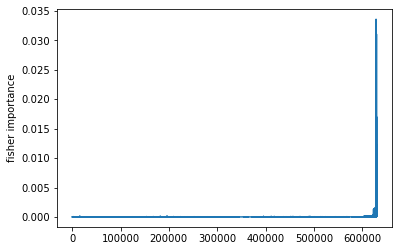

In [11]:
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

d = [x.flatten() for x in fi1]
d = np.concatenate(d)

# d = a[0].flatten()
# index = np.arange(len(d))
# plt.bar(index, d)
plt.plot(d)
plt.ylabel('fisher importance')
plt.show()

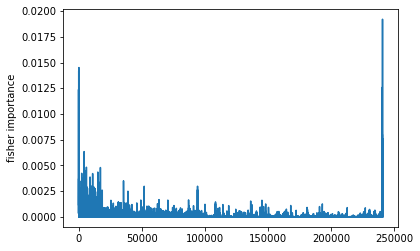

In [12]:
d = [x.flatten() for x in fi2]
d = np.concatenate(d)

# d = a[0].flatten()
# index = np.arange(len(d))
# plt.bar(index, d)
plt.plot(d)
plt.ylabel('fisher importance')
plt.show()